In [28]:
import sys, os
from datasets import load_from_disk
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from itertools import permutations
import pickle
plt.style.use('seaborn-dark')

In [72]:
from transformers import LongformerTokenizerFast
tokenizer = LongformerTokenizerFast.from_pretrained('allenai/longformer-base-4096', max_length=4096)
id2label =  {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H"}
label2description= {'A': 'Human Necessities', 'B':'Performing Operations; Transporting', 'C':'Chemistry; Metallurgy','D':'Textiles; Paper',
                    'E':'Fixed Constructions','F':'Mechanical Engineering; Lighting; Heating; Weapons; Blasting','G':'Physics','H':'Electricity'}

In [83]:
tokenized_data = load_from_disk('../data/refined_patents/tokenized/longformer_tokenizer_no_stopwords/')

In [84]:
input_ids = tokenized_data['train'][8:18]['input_ids']

In [85]:
labels = tokenized_data['train'][8:18]['labels']

In [5]:
pmi_scores = pd.read_pickle('../data/refined_patents/stats/bigram_pmi_scores_w10_int.pkl')

In [97]:
window = 10
idlist = range(0,4096)

#global_attention_map = np.zeros(input_ids.shape, dtype=np.long)

for j in range(len(input_ids)):
    pmi_map = np.zeros((4096, 4096))
    for i in tqdm(range(1,len(input_ids[j]) - window)):
        for k, bigram in enumerate(perm(idlist[i:i+window], 2)):
            x = input_ids[j][bigram[0]]
            y = input_ids[j][bigram[1]]
            if (x,y) in pmi_scores.keys():
                pmi_map[bigram[0]][bigram[1]] = pmi_scores[(x,y)]

    token_scores = pmi_map.sum(axis=1)

    pmi_map = pd.DataFrame(data={'pmi_values':token_scores, 'input_ids':input_ids[j]})

    unique_pmi_map = pmi_map.drop_duplicates(subset=['input_ids'])

    top_tfidf_idxs = unique_pmi_map.sort_values(by='pmi_values')[-128:].index

    # Print the label description of the document along with the determinded global tokens.
    print(label2description[id2label[labels[j]]])  
    print(tokenizer.convert_ids_to_tokens(np.array(input_ids[j])[top_tfidf_idxs]))
    
    print('\n################\n')

    '''print(label2description[id2label[labels[j]]],':')
    print(tokenizer.convert_ids_to_tokens(np.array(input_ids[j])[argsorted_token_scores[-128:]]))
    print('\n################\n')'''

100%|██████████| 4085/4085 [00:00<00:00, 17546.69it/s]


Mechanical Engineering; Lighting; Heating; Weapons; Blasting
['ays', 'Ġactivates', 'Ġexch', 'Ġelectric', 'Ġelectrom', 'Ġejected', 'Ġpasses', 'Ġdischarge', 'Ġin', 'eb', 'ear', 'Ġfront', 'Ġexisting', 'let', 'anger', 'Ġfilled', 'Ġair', 'icularly', 'Ġmiddle', 'mounted', 'Ġcues', 'ap', 'Ġbuttons', 'Ġfragrance', 'Ġstates', 'Ġrear', 'rov', 'odynamic', 'Ġlow', 'zz', 'Ġabove', 'Ġpresent', 'anical', 'outs', 'Ġsuitable', 'Ġvent', 'Ġdetected', 'Ġaccess', 'abe', 'Ġlevel', 'ent', 'ented', 'def', 'Ġindic', 'Ġprec', 'Ġabsorb', 'ech', 'Ġperpend', 'Ġdescription', 'artments', 'Ġinvention', 'Ġcontinuously', 'Ġmonitoring', 'Ġbursts', 'Ġpipes', 'Ġsupplemental', 'Ġfan', 'ending', 'Ġtitanium', 'charged', 'Ġcontro', 'Ġsensor', 'Ġconditioning', 'inged', 'Ġpump', 'Ġnozzle', 'Ġsensors', 'Ġconcern', 'Ġsink', 'Ġev', 'Ġlights', 'Ġdirects', 'Ġflowing', 'Ġindicators', 'Ġdownstream', 'Ġspray', 'xt', 'oration', 'fac', 'ailed', 'Ġlimited', 'Ġexiting', 'Ġthermal', 'Ġfeatures', 'Ġmanifold', 'Ġexchange', 'Ġairs', 'Ġoutlet',

100%|██████████| 4085/4085 [00:00<00:00, 23208.77it/s]


Performing Operations; Transporting
['Ġrear', 'Ġwings', 'Ġeffort', 'Ġdownward', 'sters', 'Ġclearance', 'Ġconsidering', 'ag', 'Ġshall', 'Ġmove', 'Ġilluminate', 'Ġpermit', 'essed', 'through', 'Ġouter', 'Ġmember', 'Ġtends', 'Ġsubstantially', 'Ġlater', 'obs', 'Ġreside', 'Ġfitt', 'aper', 'Ġsized', 'Ġpush', 'Ġarticles', 'Ġplacement', 'Ġdeployed', 'eral', 'Ġlower', 'Ġball', 'Ġextend', 'Ġstud', 'Ġrotation', 'Ġfixing', 'Ġarms', 'Ġproject', 'Ġholes', 'Ġleverage', 'Ġtowards', 'Ġattaches', 'Ġbranch', 'Ġpreferred', 'Ġcircular', 'ots', 'Ġheads', 'Ġperiphery', 'Ġset', 'Ġembodiments', 'Ġmay', 'Ġhole', 'Ġposition', 'Ġlink', 'ressing', 'Ġpins', 'Ġpasses', 'Ġallowing', 'amped', 'Ġnum', 'Ġcomp', 'Ġraise', 'Ġtop', 'Ġsimilar', 'Ġlever', 'Ġupward', 'Ġdefining', 'isp', 'Ġstrut', 'Ġlegs', 'Ġpiv', 'Ġdisposed', 'Ġpair', 'Ġfixed', 'Ġinstant', 'Ġmeaning', 'Ġstructural', 'shaped', 'Ġend', 'um', 'Ġvalve', 'Ġbolt', 'Ġarm', 'Ġdifferences', 'ly', 'Ġthreaded', 'Ġwherein', 'Ġfair', 'Ġexerted', 'Ġhem', 'Ġparts', 'Ġclaims'

100%|██████████| 4085/4085 [00:00<00:00, 18413.33it/s]


Electricity
['Ġsinking', 'incre', 'met', 'fig', 'mic', 'Ġcontact', 'Ġsealed', 'onet', 'Ġranging', 'Ġconf', 'ap', 'Ġdiffuse', 'Ġfactor', 'ensation', 'Ġschematic', 'Ġabsorbing', 'rop', 'yl', 'Ġwithout', 'articles', 'Ġporous', 'Ġparticles', 'Ġled', 'Ġglobe', 'Ġinput', 'Ġvisibility', 'Ġliquid', 'ar', 'ues', 'Ġopt', 'cd', 'Ġcond', 'lu', 'orm', 'Ġmanufacturing', 'Ġregulation', 'Ġcircuitry', 'ol', 'Ġsize', 'absor', 'Ġconverter', 'Ġdiff', 'still', 'Ġsuch', 'Ġglare', 'eter', 'ifying', 'Ġadvantage', 'Ġcosts', 'Ġsour', 'Ġref', 'Ġwhite', 'Ġmodifications', 'Ġvapor', 'det', 'isting', 'Ġlimitation', 'arity', 'Ġbay', 'orpor', 'contin', 'Ġyellow', 'Ġscope', 'Ġu', 'Ġher', 'Ġconnect', 'Ġimproved', 'using', 'Ġcontacts', 'Ġtransparent', 'Ġcorrection', 'iences', 'oc', 'Ġis', 'ifier', 'Ġmet', 'Ġboiling', 'ractive', 'Ġatmospheric', 'Ġconjunction', 'Ġfrost', 'Ġpores', 'Ġnano', 'Ġev', 'Ġconducts', 'Ġrgb', 'Ġphosph', 'Ġhydro', 'Ġenterprise', 'oration', 'Ġrelevant', 'Ġfeatures', 'Ġred', 'Ġbecome', 'Ġpree', 'han',

100%|██████████| 4085/4085 [00:00<00:00, 17200.40it/s]


Performing Operations; Transporting
['Ġtrans', 'Ġsecurity', 'Ġcharging', 'Ġnumbers', 'Ġspeed', 'ired', 'Ġrepository', 'Ġhelp', 'Ġlogic', 'Ġprocessed', 'Ġbattery', 'Ġproximity', 'Ġactivates', 'Ġcar', 'Ġfront', 'ptic', 'Ġsignal', 'Ġtele', 'Ġdetected', 'axis', 'Ġrot', 'Ġstores', 'Ġphrase', 'Ġcontinue', 'Ġparticular', 'Ġmodem', 'Ġmod', 'Ġminus', 'Ġmemory', 'atively', 'Ġdescription', 'Ġantenna', 'Ġride', 're', 'Ġfrequency', 'Ġtransmission', 'Ġrear', 'Ġstored', 'Ġsettings', 'Ġcommunicated', 'Ġrefers', 'Ġlimiting', 'Ġhere', 'od', 'Ġsudden', 'Ġnotified', 'Ġantennas', 'Ġwheels', 'istent', 'Ġacceleration', 'Ġreview', 'ulated', 'Ġacceler', 'Ġinterface', 'Ġpresented', 'Ġonly', 'Ġreference', 'Ġvisual', 'Ġpatent', 'Ġsenses', 'Ġtriggers', 'Ġlimit', 'Ġoper', 'Ġalert', 'Ġapplication', 'ious', 'Ġsolely', 'Ġalarm', 'Ġsends', 'Ġaudio', 'Ġmodulation', 'Ġaudible', 'Ġtransm', 'Ġdrawings', 'Ġuser', 'celer', 'Ġfigures', 'Ġsolar', 'Ġcoupled', 'Ġonboard', 'Ġattempting', 'lessly', 'Ġmade', 'ailed', 'metry', 'cont

100%|██████████| 4085/4085 [00:00<00:00, 14197.93it/s]


Chemistry; Metallurgy
['Ġboil', 'Ġii', 'Ġpoly', 't', 'Ġcuring', 'Ġscope', 'Ġcompounds', 'Ġminutes', 'Ġflakes', 'Ġdeviation', 'Ġreactor', 'Ġc', 'Ġpure', 'Ġpresence', 'Ġpercent', 'Ġfifteen', 'det', 'rea', 'omp', 'Ġboiled', 'Ġfurnish', 'Ġca', 'Ġnos', 'Ġpar', 'inder', 'Ġweight', 'Ġstrength', 'Ġconcentration', 'onent', 'en', 'Ġstar', 'Ġcataly', 'Ġtwenty', 'Ġcondensed', 'mic', 'Ġskilled', 'il', 'Ġres', 'Ġderivatives', 'Ġmixing', 'ine', 'ide', 'col', 'Ġcatalyst', 'four', 'Ġacet', 'Ġonly', 'ap', 'degree', 'et', 'Ġcure', 'Ġheated', 'Ġsolution', 'amine', 'Ġhex', 'olar', 'ins', 'Ġcond', 'Ġwood', 'Ġast', 'Ġeconomically', 'Ġbinding', 'xy', 'Ġallowed', 'Ġwax', 'Ġmodifiers', 'other', 'Ġhydro', 'am', 'one', 'Ġunnecessary', 'yl', 'sts', 'Ġclear', 'Ġtested', 'ram', 'Ġsubstituted', 'Ġsatisf', 'Ġalk', 'Ġaccelerate', 'aldehyde', 'Ġmin', 'Ġsodium', 'Ġreacted', 'ethyl', 'Ġmel', 'rox', 'iam', 'ixtures', 'Ġdisclosed', 'Ġpat', 'Ġderivative', 'Ġlimitations', 'ah', 'aline', 'de', 'zen', 'ols', 'ben', 'Ġpotassium'

100%|██████████| 4085/4085 [00:00<00:00, 23589.56it/s]


Mechanical Engineering; Lighting; Heating; Weapons; Blasting
['Ġelong', 'Ġdesignated', 'Ġopenings', 'all', 'Ġline', 'Ġindicated', 'Ġalternating', 'ge', 'Ġpreferred', 'hed', 'Ġoffset', 'Ġapplied', 'Ġsuccessive', 'Ġreferring', 'Ġexemplary', 'Ġformed', 'Ġrotation', 'Ġmembers', 'Ġlever', 'Ġseries', 'Ġarranged', 'Ġbi', 'Ġmaintain', 'Ġplane', 'Ġregulating', 'Ġconduit', 'Ġgiven', 'Ġarticulated', 'Ġinward', 'Ġrecept', 'Ġdefine', 'Ġrectangular', 'versely', 'acles', 'Ġclosed', 'Ġtoward', 'Ġinternal', 'Ġmoves', 'Ġspace', 'Ġcenter', 'oves', 'Ġintegral', 'ial', 'Ġsidew', 'Ġarm', 'Ġdifferential', 'Ġgro', 'Ġlink', 'Ġsufficient', 'Ġouter', 'Ġposition', 'Ġaxis', 'Ġcauses', 'asing', 'shaped', 'Ġmember', 'Ġvertical', 'Ġopening', 'Ġtorque', 'Ġend', 'Ġmay', 'Ġphantom', 'Ġdownward', 'Ġurged', 'Ġsupported', 'Ġgenerally', 'ly', 'Ġax', 'Ġrestoring', 'Ġlinks', 'Ġaxle', 'Ġapplies', 'Ġunderstood', 'Ġshoulder', 'Ġovercome', 'Ġadjacent', 'Ġurge', 'Ġbear', 'ator', 'Ġoutward', 'Ġcyl', 'ially', 'description', 'Ġrot', 

100%|██████████| 4085/4085 [00:00<00:00, 19663.93it/s]


Human Necessities
['Ġconditions', 'Ġdissolve', 'Ġii', 'Ġold', 'Ġrates', 'Ġtotal', 'Ġfresh', 'mol', 'Ġdes', 'Ġa', 'Ġpe', 'ant', 'Ġdaylight', 'Ġnat', 'ogenous', 'Ġtreatments', 'Ġfive', 'Ġgreen', 'c', 'Ġremove', 'Ġinduce', 'Ġingredient', 'Ġnitrogen', 'Ġreduces', 'm', 'Ġdosage', 'aine', 'ized', 'Ġinsect', 'Ġdry', 'atur', 'Ġprobably', 'Ġtissues', 'k', 'Ġuniversity', 'Ġnic', 'Ġday', 'Ġvariance', '.,', 'um', 'ki', 'aj', 'ite', 'Ġbi', 'Ġsoil', 'ul', 'imeter', 'atography', 'Ġtable', 'Ġresulted', 'Ġslashed', 'Ġstimulate', 'Ġforty', 'Ġexperiments', 'Ġmodel', 'anted', 'Ġseed', 'Ġwhere', 'Ġweighed', 'act', 'Ġli', 'Ġdried', 'Ġsurf', 'Ġpests', 'ugar', 'ak', 'Ġadministered', 'Ġcry', 'sup', 'Ġcontent', 'Ġfertilizer', 'Ġchrom', 'mic', 'houses', 'Ġcooled', 'Ġpots', 'Ġstatistically', 'ous', 'Ġplant', 'Ġyellow', 'Ġcultivation', 'Ġweeks', 'aturation', 'Ġdays', 'eight', 'mu', 'Ġsolution', 'Ġlic', 'Ġgrow', 'Ġva', 'Ġment', 'Ġtopped', 'Ġhumidity', 'Ġbuds', 'Ġexperiment', 'icc', 'Ġke', 'Ġinc', 'stat', 'Ġtraditio

100%|██████████| 4085/4085 [00:00<00:00, 15831.53it/s]

Mechanical Engineering; Lighting; Heating; Weapons; Blasting
['Ġlongitudinal', 'Ġknowledge', 'Ġportion', 'Ġmoving', 'ward', 'Ġsealing', 'Ġrespect', 'ailed', 'Ġshoe', 'Ġengaging', 'Ġseal', 'Ġstroke', 'Ġmotor', 'Ġbore', 'Ġaccommod', 'Ġsecondary', 'Ġsupported', 'Ġconsequently', 'Ġuses', 'Ġbias', 'Ġorbital', 'Ġspaced', 'Ġresists', 'Ġalong', 'ially', 'ots', 'Ġouter', 'at', 'ext', 'Ġprimary', 'ational', 'Ġlever', 'Ġdownward', 'Ġpivotal', 'Ġapplications', 'Ġextent', 'Ġbi', 'Ġlocking', 'Ġextends', 'Ġcutting', 'Ġinner', 'det', 'Ġengagement', 'Ġseals', 'Ġtight', 'Ġchassis', 'oted', 'Ġdebris', 'Ġprevent', 'Ġmoves', 'Ġparticular', 'Ġpiv', 'Ġarm', 'Ġdriven', 'Ġmoved', 'Ġknown', 'Ġcomm', 'Ġhandle', 'Ġret', 'Ġrounded', 'oting', 'Ġslid', 'Ġaxis', 'cutting', 'Ġrotating', 'Ġpivot', 'ion', 'Ġpin', 'Ġart', 'Ġretain', 'Ġretaining', 'Ġmotion', 'rical', 'Ġfit', 'Ġengages', 'urate', 'Ġinfinitely', 'ind', 'Ġutilize', 'Ġengaged', 'Ġforegoing', 'indle', 'asing', 'Ġcyl', 'Ġherein', 'Ġdiseng', 'Ġengage', 'Ġmounted

100%|██████████| 1534/1534 [00:00<00:00, 9205.05it/s]


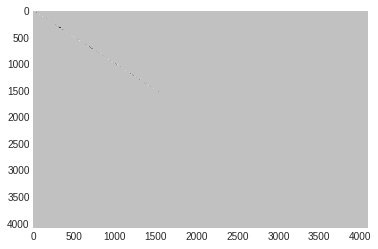

In [30]:
window = 10
doc_id = 0

idlist = range(0,4096)
pmi_map = np.zeros((4096, 4096))

for i in tqdm(range(1,len(input_ids[doc_id]) - window)):
    for k, bigram in enumerate(perm(idlist[i:i+window], 2)):
        x = input_ids[doc_id][bigram[0]]
        y = input_ids[doc_id][bigram[1]]
        if (x,y) in pmi_scores.keys():
            pmi_map[bigram[0]][bigram[1]] = pmi_scores[(x,y)]
plt.imshow(pmi_map, cmap='Greys', interpolation='nearest', aspect='auto' )
plt.show()

In [101]:
print(pmi_map)

      pmi_values  input_ids
0       0.000000          0
1      22.972191      17701
2      18.917894      13355
3      16.757258       8194
4      14.296609       6813
...          ...        ...
4091    0.000000          1
4092    0.000000          1
4093    0.000000          1
4094    0.000000          1
4095    0.000000          1

[4096 rows x 2 columns]
